## CHEMICAL DATABASE MANAGEMENT SYSTEM FROM SMILES (CDMSS)

### <span style="color:Black">Introduction: </span>
#### <span style="color:purple"> In the field of drug discovery, the ability to efficiently analyze and organize large sets of molecules is crucial. The use of a computational tool, such as the RDKit library, can streamline this process and provide valuable insights. This notebook demonstrates how to use RDKit and other essential libraries to convert SMILES strings into 3D SDF files, analyze molecular properties, and sort molecules into folders and subfolders. The notebook is designed to be a useful resource for researchers and scientists working in the field of drug discovery, providing a streamlined and efficient workflow for the analysis of large sets of molecules. Adios!!!!</span>

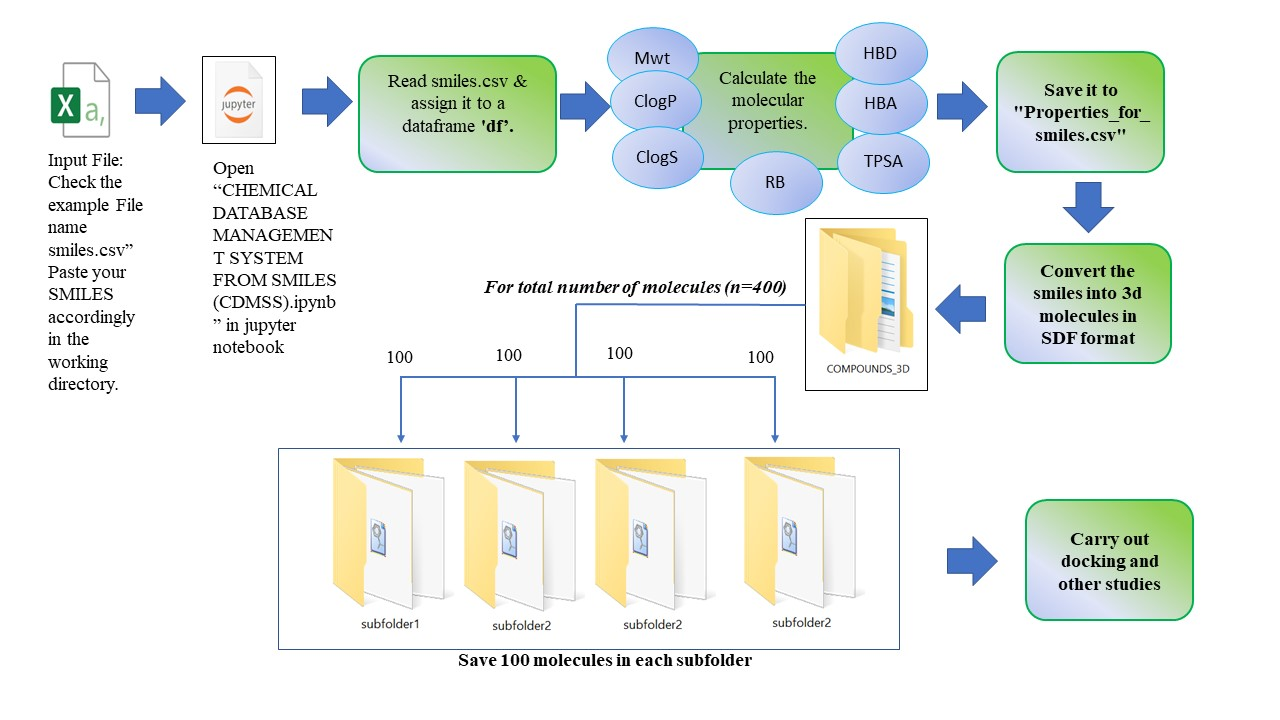

<code style="background:cyan;color:black">*Note: a set of 500 Lipinski and ADME screened molecules are attached as example. These molecules are Dock ready compounds!!! </code>

### *Step-1:* 
> #### a) Read smilesfrom the csv file and assign it to a dataframe 'df'.
> #### b) Calculate the molecular properties. 

#### This code imports the necessary libraries <code style="background:yellow;color:black">(pandas, rdkit, and some modules from rdkit)</code>, reads a csv file named <code style="background:yellow;color:black">'smiles.csv'</code> using pandas, then it creates empty lists to store calculated properties, and iterates through the SMILES codes in the dataframe, using the <code style="background:yellow;color:black">rdkit library</code>  to calculate properties such as molecular weight, ClogP, ClogS, TPSA, HBA, HBD, and the number of rotatable bonds. Then it appends the calculated properties to the corresponding lists. Finally, it adds the calculated properties to the dataframe as new columns, labeled 'MW', 'ClogP', 'ClogS', 'TPSA', 'HBA', 'HBD', and 'Rotatable Bonds'.

In [24]:
# Calling important libraries:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors

# Read the SMILES codes from a CSV file
df = pd.read_csv('smiles.csv')

# Create empty lists to store the calculated properties
mw = []
clogp = []
clogs = []
tpsa = []
hba = []
hbd = []
rot_bonds = []

# Iterate through the SMILES codes and calculate the properties
for index, row in df.iterrows():
    mol = Chem.MolFromSmiles(row['SMILES'])
    mw.append(Descriptors.MolWt(mol))
    clogp.append(rdMolDescriptors.CalcCrippenDescriptors(mol)[0])
    clogs.append(rdMolDescriptors.CalcCrippenDescriptors(mol)[1])
    tpsa.append(rdMolDescriptors.CalcTPSA(mol))
    hba.append(rdMolDescriptors.CalcNumHBA(mol))
    hbd.append(rdMolDescriptors.CalcNumHBD(mol))
    rot_bonds.append(rdMolDescriptors.CalcNumRotatableBonds(mol))

# Add the calculated properties to the dataframe
df['MW'] = mw
df['ClogP'] = clogp
df['ClogS'] = clogs
df['TPSA'] = tpsa
df['HBA'] = hba
df['HBD'] = hbd
df['Rotatable Bonds'] = rot_bonds


### Step-2: 
#### This code block is adding the calculated properties that were stored in the empty lists (mw, clogp, clogs, tpsa, hba, hbd, and rot_bonds) to the dataframe as new columns, labeled 'MW', 'ClogP', 'ClogS', 'TPSA', 'HBA', 'HBD', and 'Rotatable Bonds'.
#### It then prints the entire dataframe so that you can see the calculated properties for each SMILES code in the dataframe.
#### Please note that this code block assumes that the dataframe 'df' and the empty lists (mw, clogp, clogs, tpsa, hba, hbd, and rot_bonds) are already defined and populated. If they are not defined, you will get an error while running this block of code.

In [25]:
# Add the calculated properties to the dataframe
df['MW'] = mw
df['ClogP'] = clogp
df['ClogS'] = clogs
df['TPSA'] = tpsa
df['HBA'] = hba
df['HBD'] = hbd
df['Rotatable Bonds'] = rot_bonds

# Print the dataframe
print(df)


                                                SMILES       MW    ClogP  \
0              CC(C)n(cc1)nc1NS(c(cc1)cc(O)c1Cl)(=O)=O  315.782  2.62380   
1        CC(C)[C@@H](C)n1nccc1NC(C(C(N1)=O)=CN=C1SC)=O  321.406  2.15760   
2         CC(C)[C@H](C)n1nccc1NC(C(C(N1)=O)=CN=C1SC)=O  321.406  2.15760   
3    C[C@@H](CC[N@H+](Cc1ccc(C(OC)=O)s1)C1)[C@@H]1n...  320.438  1.39720   
4    C[C@H](CC[N@H+](Cc1ccc(C(OC)=O)s1)C1)[C@@H]1n1...  320.438  1.39720   
..                                                 ...      ...      ...   
495  Cc1c(C(N(C[C@H]2C(O)=O)C[C@H]2c2cc(OC)ccc2)=O)...  344.367  2.24044   
496  C[C@H](C1)O[C@H](C)CN1[C@H](c1ccco1)c(sc1ncnn1...  334.401  2.28800   
497  C[C@H](C1)O[C@@H](C)CN1[C@H](c1ccco1)c(sc1ncnn...  334.401  2.28800   
498         CC(N1[C@H](c(cc2)ccc2Br)SC[C@@H]1C(O)=O)=O  330.203  2.49620   
499        CC(N1[C@@H](c(cc2)ccc2Br)SC[C@@H]1C(O)=O)=O  330.203  2.49620   

       ClogS   TPSA  HBA  HBD  Rotatable Bonds  
0    76.5373  84.22    5    2         

### Step-3:
#### Save the list of molecular properties for the given smiles in a csv file named "Properties_for_smiles.csv", in the current working directory

In [26]:
df.to_csv('properties_for_smilels.csv', index = False)

#### a) Converting the molecules into .sdf format.
#### b) Making a directory named "COMPOUNDS_3D".
#### c) Saving 100 molecules in succesive sub-directories named as subfolder1, subfolder2 and so on..

In [27]:
import pandas as pd
df = pd.read_csv('smiles.csv')


In [28]:
import os
print(os.path.exists("COMPOUNDS_3D"))


True


## Details about the piece of code below: 
> This code creates a directory called "COMPOUNDS_3D", and then it creates a variable called "folder_number" which is initially set to 0. It then iterates through the dataframe, using the "for index, row in df.iterrows():" loop. On each iteration, it checks if the current index is divisible by 100 with no remainder (if (index)%100==0). If it is divisible by 100, it increments the folder_number by 1, and creates a new directory called "subfolder" followed by the current folder number. Then it converts the SMILES code to a molecule using Chem.MolFromSmiles(row['SMILES']), creates a new SDWriter object "w" with the directory and file name, writes the molecule to that file and if the current index+1 is divisible by 100 then it will close the current file. This will create a new subfolder for every 100 molecules and write the molecules in that subfolder.

In [30]:
import os
os.mkdir("COMPOUNDS_3D")
folder_number=0
for index, row in df.iterrows():
    if (index)%100==0:
        folder_number +=1
        os.mkdir("COMPOUNDS_3D/subfolder"+str(folder_number))
    mol = Chem.MolFromSmiles(row['SMILES'])
    w = Chem.SDWriter("COMPOUNDS_3D/subfolder"+str(folder_number)+"/compound"+str(index)+".sdf")
    w.write(mol)
    if (index+1)%100==0:
        w.close()





> ENJOY STORING YOUR SCREENED COMPOUNDS USING THEIR SMILES